# Calculando a Covariância e corelação entre Ativos

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
carteira = ['VULC3.SA','ITUB4.SA', 'KLBN11.SA', 'RAIL3.SA', 'UGPA3.SA', 'ANIM3.SA', 'MLAS3.SA', 'POMO4.SA', 'MEAL3.SA', 'GMAT3.SA', 'MYPK3.SA']
mdata = pd.DataFrame()
for t in carteira:
    mdata[t] = yf.download(t, start='2015-1-1', end = '2022-9-19', interval = '1d')['Adj Close']



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


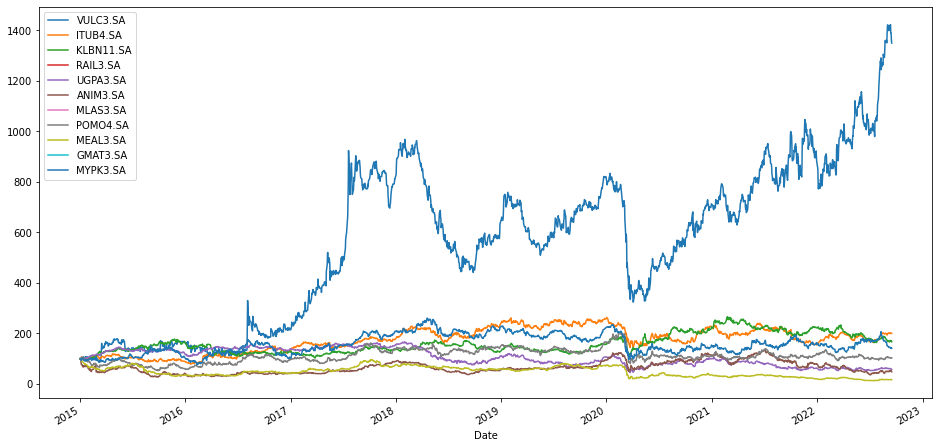

In [3]:
#normalizar valores pegos os valores da primeira possição e transformo na base 100 ai todos vao sair da msm origem

(mdata / mdata.iloc[0] * 100).plot(figsize = (16,8));

In [4]:
df_log= np.log(mdata / mdata.shift(1))
print(df_log.head())

            VULC3.SA  ITUB4.SA  KLBN11.SA  RAIL3.SA  UGPA3.SA  ANIM3.SA  \
Date                                                                      
2015-01-02       NaN       NaN        NaN       NaN       NaN       NaN   
2015-01-05       0.0  0.005013  -0.024798       NaN -0.027010 -0.064638   
2015-01-06       0.0  0.016047   0.032466       NaN  0.001419 -0.152562   
2015-01-07       0.0  0.035540   0.010362       NaN  0.026775 -0.048957   
2015-01-08       0.0  0.015521  -0.000687       NaN -0.010305 -0.007809   

            MLAS3.SA  POMO4.SA  MEAL3.SA  GMAT3.SA  MYPK3.SA  
Date                                                          
2015-01-02       NaN       NaN       NaN       NaN       NaN  
2015-01-05       NaN  0.003231 -0.021414       NaN -0.050054  
2015-01-06       NaN  0.009631 -0.044255       NaN -0.017857  
2015-01-07       NaN  0.034540 -0.004535       NaN  0.044060  
2015-01-08       NaN  0.003082 -0.033275       NaN  0.038889  


In [6]:
df_log[['VULC3.SA','ITUB4.SA', 'KLBN11.SA', 'RAIL3.SA', 'UGPA3.SA', 'ANIM3.SA', 'MLAS3.SA', 'POMO4.SA', 'MEAL3.SA', 'GMAT3.SA', 'MYPK3.SA']].std() *250 **0.5

VULC3.SA     0.618175
ITUB4.SA     0.329599
KLBN11.SA    0.310746
RAIL3.SA     0.522381
UGPA3.SA     0.404623
ANIM3.SA     0.539947
MLAS3.SA     0.619197
POMO4.SA     0.451027
MEAL3.SA     0.512258
GMAT3.SA     0.403325
MYPK3.SA     0.454152
dtype: float64

In [7]:
cov_matrix = df_log.cov()
cov_matrix

,VULC3.SA,ITUB4.SA,KLBN11.SA,RAIL3.SA,UGPA3.SA,ANIM3.SA,MLAS3.SA,POMO4.SA,MEAL3.SA,GMAT3.SA,MYPK3.SA
VULC3.SA,0.001529,0.000179,0.000040,0.000309,0.000274,0.000253,0.000413,0.000242,0.000273,0.000228,0.000262
ITUB4.SA,0.000179,0.000435,0.000075,0.000267,0.000269,0.000230,0.000158,0.000246,0.000213,0.000106,0.000256
KLBN11.SA,0.000040,0.000075,0.000386,0.000107,0.000123,0.000085,0.000094,0.000105,0.000088,0.000057,0.000100
RAIL3.SA,0.000309,0.000267,0.000107,0.001092,0.000296,0.000289,0.000299,0.000251,0.000278,0.000176,0.000294
UGPA3.SA,0.000274,0.000269,0.000123,0.000296,0.000655,0.000311,0.000370,0.000295,0.000305,0.000248,0.000285
ANIM3.SA,0.000253,0.000230,0.000085,0.000289,0.000311,0.001166,0.000538,0.000351,0.000366,0.000328,0.000291
MLAS3.SA,0.000413,0.000158,0.000094,0.000299,0.000370,0.000538,0.001534,0.000294,0.000665,0.000430,0.000331
POMO4.SA,0.000242,0.000246,0.000105,0.000251,0.000295,0.000351,0.000294,0.000814,0.000335,0.000212,0.000388
MEAL3.SA,0.000273,0.000213,0.000088,0.000278,0.000305,0.000366,0.000665,0.000335,0.001050,0.000320,0.000327
GMAT3.SA,0.000228,0.000106,0.000057,0.000176,0.000248,0.000328,0.000430,0.000212,0.000320,0.000651,0.000159


In [8]:
cov_matrix_a = df_log.cov() * 250
cov_matrix_a

,VULC3.SA,ITUB4.SA,KLBN11.SA,RAIL3.SA,UGPA3.SA,ANIM3.SA,MLAS3.SA,POMO4.SA,MEAL3.SA,GMAT3.SA,MYPK3.SA
VULC3.SA,0.382140,0.044821,0.010110,0.077227,0.068494,0.063206,0.103206,0.060504,0.068229,0.056961,0.065609
ITUB4.SA,0.044821,0.108635,0.018815,0.066663,0.067273,0.057527,0.039420,0.061598,0.053178,0.026551,0.064114
KLBN11.SA,0.010110,0.018815,0.096563,0.026758,0.030679,0.021190,0.023608,0.026299,0.022021,0.014165,0.025041
RAIL3.SA,0.077227,0.066663,0.026758,0.272882,0.074092,0.072133,0.074647,0.062851,0.069454,0.044008,0.073430
UGPA3.SA,0.068494,0.067273,0.030679,0.074092,0.163719,0.077839,0.092540,0.073796,0.076284,0.061882,0.071365
ANIM3.SA,0.063206,0.057527,0.021190,0.072133,0.077839,0.291543,0.134453,0.087745,0.091545,0.081975,0.072783
MLAS3.SA,0.103206,0.039420,0.023608,0.074647,0.092540,0.134453,0.383404,0.073426,0.166209,0.107595,0.082646
POMO4.SA,0.060504,0.061598,0.026299,0.062851,0.073796,0.087745,0.073426,0.203425,0.083735,0.053045,0.096999
MEAL3.SA,0.068229,0.053178,0.022021,0.069454,0.076284,0.091545,0.166209,0.083735,0.262409,0.079964,0.081829
GMAT3.SA,0.056961,0.026551,0.014165,0.044008,0.061882,0.081975,0.107595,0.053045,0.079964,0.162671,0.039797


In [9]:
corr_matrix = df_log.corr()
corr_matrix

,VULC3.SA,ITUB4.SA,KLBN11.SA,RAIL3.SA,UGPA3.SA,ANIM3.SA,MLAS3.SA,POMO4.SA,MEAL3.SA,GMAT3.SA,MYPK3.SA
VULC3.SA,1.000000,0.219979,0.052628,0.243658,0.273837,0.189363,0.400551,0.217006,0.215461,0.355376,0.233696
ITUB4.SA,0.219979,1.000000,0.183702,0.386138,0.504437,0.323250,0.201084,0.414364,0.314963,0.204904,0.428319
KLBN11.SA,0.052628,0.183702,1.000000,0.164127,0.243999,0.126294,0.134885,0.187642,0.138341,0.123628,0.177438
RAIL3.SA,0.243658,0.386138,0.164127,1.000000,0.346591,0.269264,0.365574,0.269521,0.258281,0.318917,0.308747
UGPA3.SA,0.273837,0.504437,0.243999,0.346591,1.000000,0.356281,0.348199,0.404370,0.368041,0.360850,0.388358
ANIM3.SA,0.189363,0.323250,0.126294,0.269264,0.356281,1.000000,0.372821,0.360305,0.330974,0.376524,0.296808
MLAS3.SA,0.400551,0.201084,0.134885,0.365574,0.348199,0.372821,1.000000,0.324375,0.527398,0.393438,0.329448
POMO4.SA,0.217006,0.414364,0.187642,0.269521,0.404370,0.360305,0.324375,1.000000,0.362422,0.353073,0.473547
MEAL3.SA,0.215461,0.314963,0.138341,0.258281,0.368041,0.330974,0.527398,0.362422,1.000000,0.385845,0.351737
GMAT3.SA,0.355376,0.204904,0.123628,0.318917,0.360850,0.376524,0.393438,0.353073,0.385845,1.000000,0.235008
